In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


The dataset consists of almost 54,000 rows and 10 columns:

* **price**: Price in dollars. Data were collected in 2008.
* **carat**: Diamond weight. 1 carat is equal to 0.2 grams.
* **cut**: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
* **color**: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
* **clarity** : Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
* **x, y, z**: Diamond length, width, and depth, respectively, in mm.
* **table**: Ratio of the width of the top face of diamond to its overall width, as a percentage.
* **depth**: Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only on the variables in the top five bullet points: `price` and the four 'C's of diamond grade. Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond.

In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

### 1. `price`. 

Is the distribution of `price` skewed or symmetric? Is it unimodal or multimodal?

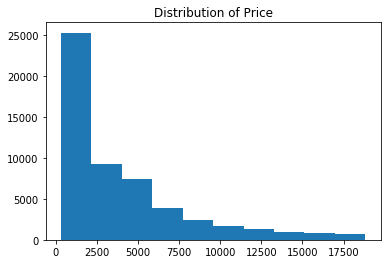

In [5]:
# univariate plot of diamond prices
plt.hist(data = diamonds, x = 'price')
plt.title('Distribution of Price');

**Price distribution comment 1:** <span style="color=white">We should create a histogram for price, since it is a numeric variable. The initial plot should show that diamond price follows a highly skewed distribution. Let's perform log scaling on x-axis.</span>

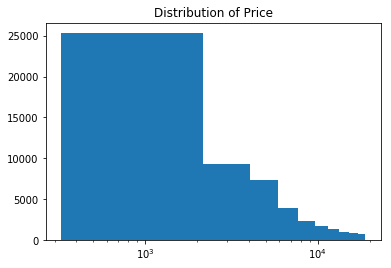

In [6]:
# univariate plot of diamond prices
plt.hist(data = diamonds, x = 'price')
plt.xscale('log')
plt.title('Distribution of Price');

**Price distribution comment 2:** <span style="color=white">Under a log scale, we can see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

### 2. First diamond 'C' metric: `carat` weight
Is there an interesting pattern in these values?

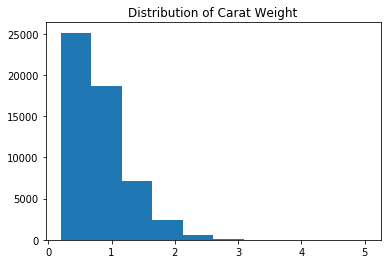

In [7]:
# univariate plot of carat weights
plt.hist(data = diamonds, x = 'carat')
plt.title('Distribution of Carat Weight');

**Carat distribution comment:** <span style="color=white">We can see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

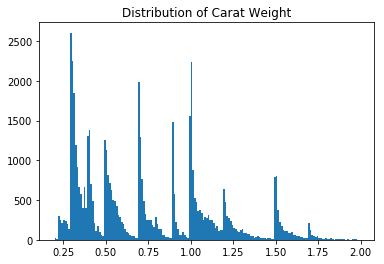

In [8]:
# univariate plot of carat weights
bins = np.arange(0.2, 2, 0.01)
plt.hist(data = diamonds, x = 'carat', bins=bins)
plt.title('Distribution of Carat Weight');

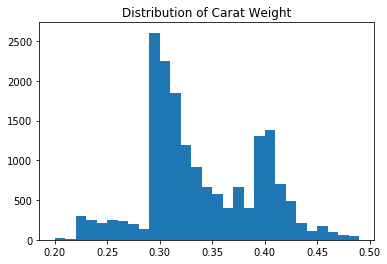

In [9]:
bins = np.arange(0.2, 0.5, 0.01)
plt.hist(data = diamonds, x = 'carat', bins=bins)
plt.title('Distribution of Carat Weight');

### 3. Other three 'C' quality measures: `cut`, `color`, and `clarity`

Are the data for each higher on the quality scale, or lower?

**General categorical feature comment:** <span style="color=white">Since these features are categorical, we should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. </span>

In [10]:
def ordered_barchart(ordered_values, dataframe, column):
    ordered_cate = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_values)
    dataframe[column] = dataframe[column].astype(ordered_cate)
    
    base_color = sb.color_palette()[0]
    sb.countplot(data = dataframe, x = column, color = base_color)
    plt.title(f'Distribution of {column.capitalize()}');

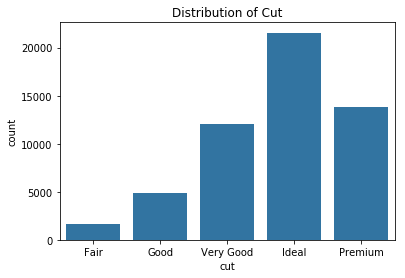

In [11]:
ordered_cut = ['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']
ordered_barchart(ordered_values = ordered_cut, dataframe = diamonds, column = 'cut')

**Cut distribution comment:** <span style="color=white">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, **Ideal**. There is a consistent decrease in number of diamonds of lower cut grades.</span>

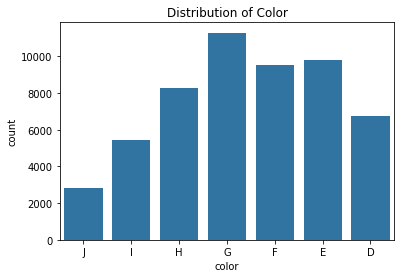

In [12]:
ordered_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordered_barchart(ordered_values = ordered_color, dataframe = diamonds, column = 'color')

**Color distribution comment:** <span style="color=white">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

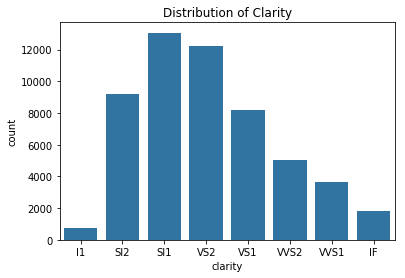

In [13]:
ordered_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordered_barchart(ordered_values = ordered_clarity, dataframe = diamonds, column = 'clarity')

**Clarity distribution comment:** <span style="color=white">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>